In [ ]:
Práctica 7: análisis de regresión lineal simple
El Análisis de Regresión nos permite descubrir si existe una relación entre una/s variable/s independiente/s y una variable dependiente (el objetivo). Por ejemplo, en una Regresión Lineal Simple queremos saber si hay una relación entre $x$ y $y$. Esto es muy útil en la predicción (por ejemplo, hacia dónde se dirige la tendencia) y en la modelización de series temporales (por ejemplo, niveles de temperatura por año y si el calentamiento global es cierto).

In [1]:
# Importing the libraries 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file = 'pmsm_temperature_data.csv'
df = pd.read_csv(file)
names =["stator_tooth", "pm"]
df = df[names]
df

,stator_tooth,pm
0,-2.066143,-2.522071
1,-2.064859,-2.522418
2,-2.064073,-2.522673
3,-2.063137,-2.521639
4,-2.062795,-2.521900
5,-2.062549,-2.522203
6,-2.062115,-2.522538
7,-2.061953,-2.522844
8,-2.062443,-2.522808
9,-2.062317,-2.522677


In [3]:
# Definimos quién es X y quién y
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [ ]:
El objetivo general aquí es crear un modelo que prediga el salario basado en los años de experiencia. En primer lugar, crearemos un modelo utilizando el conjunto de entrenamiento (70% del conjunto de datos). Luego se ajustará a una línea que se aproxime lo más posible a la mayoría de los puntos de datos.

In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 123)

In [5]:
# Fitting Simple Linear Regression to the Training set 
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:

y_pred = model.predict(X_test)
print ("Desempeño del modelo:", model.score(X_test, y_test))

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

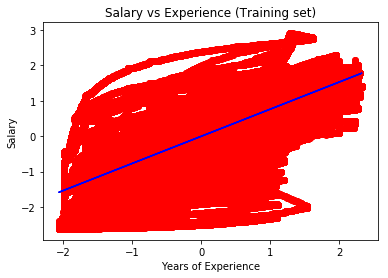

In [11]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_train, model.predict(X_train), color = 'blue') 
plt.title('Salary vs Experience (Training set)') 
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

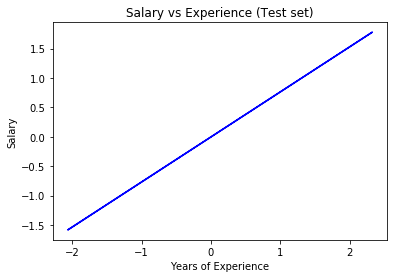

In [12]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
K-Folds Cross Validation
En la validación cruzada de K-Folds dividimos nuestros datos en k diferentes subconjuntos (o volúmenes). Utilizamos subconjuntos $k-$1 para entrenar nuestros datos y dejamos el último subconjunto (o el último pliegue) como datos de prueba. Luego promediamos el modelo contra cada uno de los pliegues y luego finalizamos nuestro modelo. Después de eso lo probamos contra el conjunto de prueba.

In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [14]:
kf = KFold(n_splits=5, shuffle=True, random_state=123)
cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
print("Desepeño de cross-validation con 5 volúmenes:", cv_scores.mean())

('Desepe\xc3\xb1o de cross-validation con 5 vol\xc3\xbamenes:', 0.5903580202512115)
